<a href="https://colab.research.google.com/github/cane-code/credit-fraud-detection/blob/main/src/model_rf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **algoritma Random Forest**

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load dataset
df = pd.read_csv('creditcard.csv')


In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
# Cek data imbalance
print(df['Class'].value_counts())

Class
0    284315
1       492
Name: count, dtype: int64


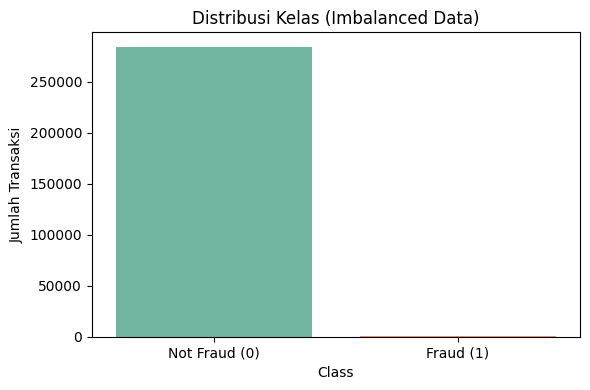

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisasi distribusi kelas
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', hue='Class', data=df, palette='Set2', legend=False)
plt.title('Distribusi Kelas (Imbalanced Data)')
plt.xticks([0, 1], ['Not Fraud (0)', 'Fraud (1)'])
plt.xlabel('Class')
plt.ylabel('Jumlah Transaksi')
plt.tight_layout()
plt.show()


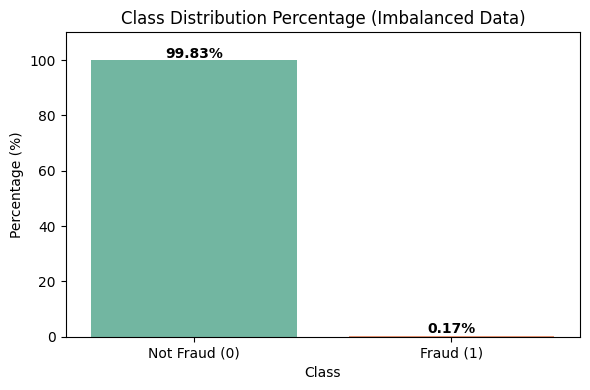

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Hitung persentase distribusi kelas
class_percent = df['Class'].value_counts(normalize=True) * 100

# Buat DataFrame
percent_df = pd.DataFrame({
    'Class': ['Not Fraud (0)', 'Fraud (1)'],
    'Percentage': class_percent.sort_index().values
})

# Visualisasi
plt.figure(figsize=(6, 4))
sns.barplot(x='Class', y='Percentage', hue='Class', data=percent_df, palette='Set2', legend=False)
plt.title('Class Distribution Percentage (Imbalanced Data)')
plt.ylabel('Percentage (%)')
plt.ylim(0, 110)

# Tambahkan nilai persentase di atas batang
for i, val in enumerate(percent_df['Percentage']):
    plt.text(i, val + 1, f"{val:.2f}%", ha='center', fontweight='bold')

plt.tight_layout()
plt.show()


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
# Pisahkan fitur dan target
# Drop rows with NaN values from the dataframe
#df.dropna(inplace=True) tidak perlu ini karna data pada info tidak ada yang null
X = df.drop('Class', axis=1)
y = df['Class']

#Cane ...Kita coba dengan di split dulu baru di smote
data yang kita SMOTE untuk di data training saja untuk lebih membuat ampuh  model, karna saat di coba dengan data tes dia memeriksa dengan data buta, kalau semuanya nanti takut model tidak valid

In [ ]:
# Split data dan saya ubah menjadi 70 | 30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)


Mulai lakukan Standar scaler pada data Training sebelum SMOTE

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

#saya lakukan standar scaler untuk hanya pada data training
scaler = StandardScaler()

# Simpan indeks kolom Time dan Amount , saya lakukan pada data training dengan fit
time_amount_cols = ['Time', 'Amount']
X_train[time_amount_cols] = scaler.fit_transform(X_train[time_amount_cols])
X_test[time_amount_cols] = scaler.transform(X_test[time_amount_cols])


#Skenario 1 Baseline random forest

In [ ]:
# Latih model tanpa SMOTE dan tanpa tuning
rf_baseline = RandomForestClassifier(random_state=42, class_weight=None)
rf_baseline.fit(X_train, y_train)

# Prediksi
y_pred_1 = rf_baseline.predict(X_test)
y_proba_1 = rf_baseline.predict_proba(X_test)[:, 1]

In [ ]:
print("Confusion Matrix Baseline:")
print(confusion_matrix(y_test, y_pred_1))

print("\nClassification Report  Baseline:")
print(classification_report(y_test, y_pred_1, digits=4))

print("\nROC AUC Score Baseline:")
print(roc_auc_score(y_test, y_proba_1))

Confusion Matrix Baseline:
[[85290     5]
 [   36   112]]

Classification Report  Baseline:
              precision    recall  f1-score   support

           0     0.9996    0.9999    0.9998     85295
           1     0.9573    0.7568    0.8453       148

    accuracy                         0.9995     85443
   macro avg     0.9784    0.8783    0.9225     85443
weighted avg     0.9995    0.9995    0.9995     85443


ROC AUC Score Baseline:
0.9307385892839318


#Skenario 2 Penerapan SMOTE

In [ ]:
# Menerapkan SMOTE hanya pada training set
#smote = SMOTE(random_state=42,k_neighbors=1) # memberikan nilai K_n lebih rendah karna minoritas lebih sedikit
smote = SMOTE(random_state=42) # memberikan nilai K_n lebih rendah karna minoritas lebih sedikit

X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


#Hitung distribusi sebelum dan sesudah SMOTE

In [ ]:
import pandas as pd

original_dist = y_train.value_counts(normalize=True) * 100
smote_dist = pd.Series(y_train_smote).value_counts(normalize=True) * 100


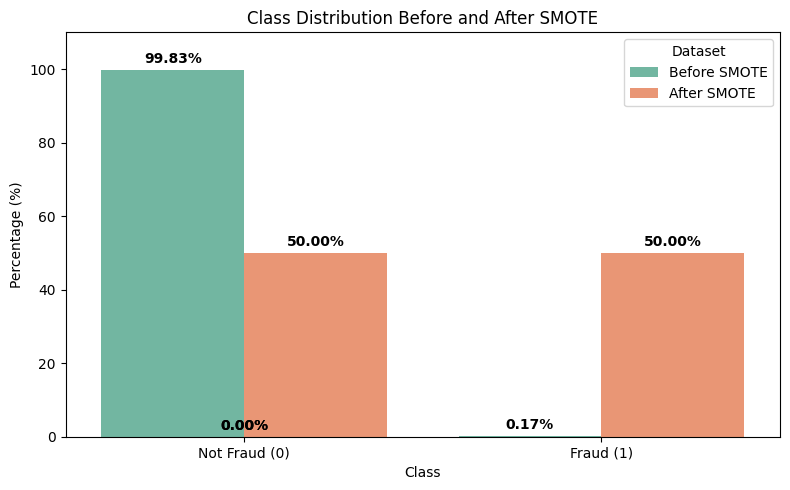

In [ ]:
#Visualisasikan sebelum dan sesudah smote
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Dataframe dist_df harus sudah ada sebelumnya

plt.figure(figsize=(8, 5))
ax = sns.barplot(x='Class', y='Percentage', hue='Dataset', data=dist_df, palette='Set2')

plt.title('Class Distribution Before and After SMOTE')
plt.ylabel('Percentage (%)')
plt.ylim(0, 110)  # beri ruang di atas batang agar label tidak menabrak

# Tambahkan label angka di atas batang
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}%',
                xy=(p.get_x() + p.get_width() / 2, height),
                xytext=(0, 5),  # geser ke atas 5 pt
                textcoords='offset points',
                ha='center', fontsize=10, fontweight='bold')

plt.legend(title='Dataset')
plt.tight_layout()
plt.show()



#Mulai melakukan Pelatihan Enhanced Random Forest Classifie
Konfigurasi Enhanced Random Forest
class_weight='balanced' → bantu model memperhatikan kelas minoritas.

n_estimators=100 → jumlah pohon.

random_state=42 → hasil konsisten.

Gunakan data hasil SMOTE untuk pelatihan.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Inisialisasi dan latih Random Forest
rf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf.fit(X_train_smote, y_train_smote)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [ ]:
# Model baseline random forest
model_no_smote = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
model_no_smote.fit(X_train, y_train)

# Prediksi pada test set


In [ ]:
y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)[:, 1]

#Evaluasi

In [ ]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=4))

print("\nROC AUC Score:")
print(roc_auc_score(y_test, y_proba))

Confusion Matrix:
[[85276    19]
 [   31   117]]

Classification Report:
              precision    recall  f1-score   support

           0     0.9996    0.9998    0.9997     85295
           1     0.8603    0.7905    0.8239       148

    accuracy                         0.9994     85443
   macro avg     0.9300    0.8952    0.9118     85443
weighted avg     0.9994    0.9994    0.9994     85443


ROC AUC Score:
0.9511345758678545


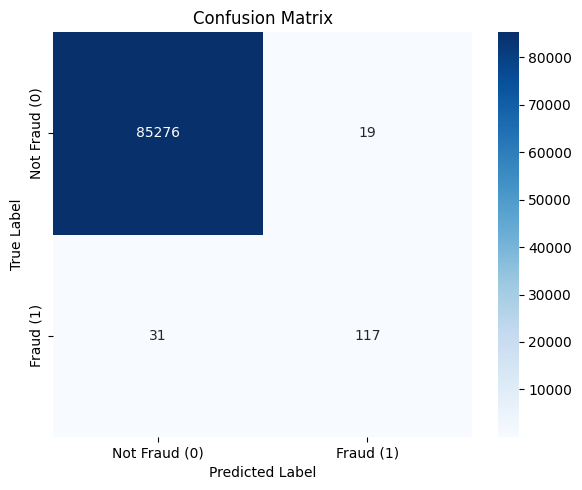

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Buat confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Buat heatmap dari confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Fraud (0)', 'Fraud (1)'],
            yticklabels=['Not Fraud (0)', 'Fraud (1)'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()


#ROC Curve Python (Model Terbaik)

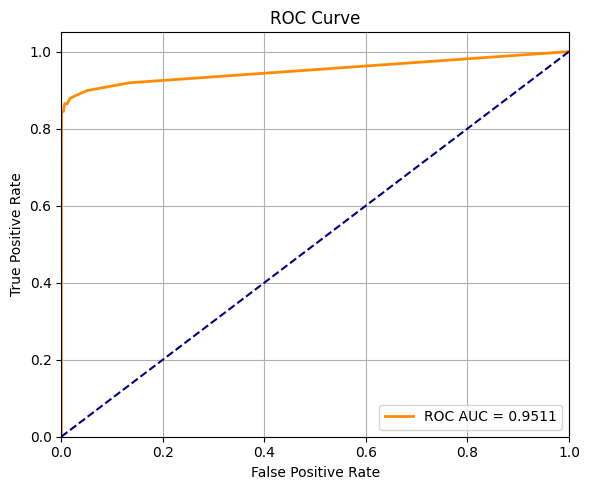

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score

# Asumsikan Anda sudah punya:
# y_test  → label asli dari data uji
# y_proba → probabilitas prediksi kelas 1 dari model terbaik
# Contoh: y_proba = model.predict_proba(X_test)[:, 1]

# Hitung ROC Curve dan AUC
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

# Plot ROC Curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC AUC = {roc_auc:.4f}')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


#Precision-Recall Curve

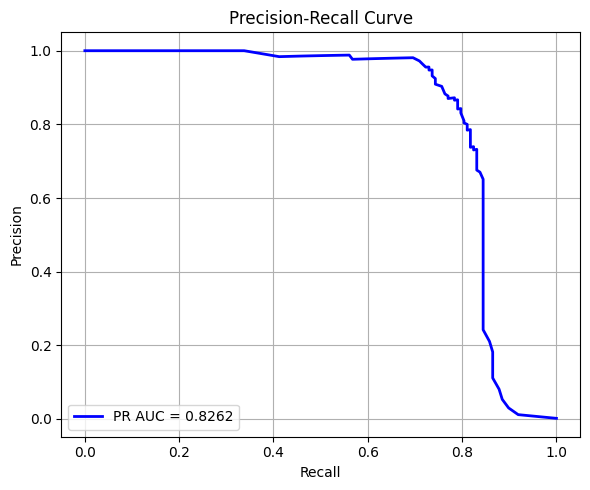

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, auc

# Asumsikan Anda sudah punya:
# y_test  → label asli dari data uji
# y_proba → probabilitas prediksi kelas 1 dari model terbaik

# Hitung Precision-Recall Curve dan Area Under Curve
precision, recall, _ = precision_recall_curve(y_test, y_proba)
pr_auc = auc(recall, precision)

# Plot Precision-Recall Curve
plt.figure(figsize=(6, 5))
plt.plot(recall, precision, color='blue', lw=2, label=f'PR AUC = {pr_auc:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.grid(True)
plt.tight_layout()
plt.show()


#Skenario 3 Tuned RF (Tuned Random Forest)

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

# Split data sudah dilakuan
#X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# pnerapan SMOTE sudah dilakukan pada skenario 2
#smote = SMOTE(random_state=42)
#X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Lakukan Tuning dengan GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'class_weight': ['balanced']
}


In [ ]:

rf_turned = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf_turned, param_grid, scoring='f1', cv=3)
grid_search.fit(X_train_smote, y_train_smote)


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid={'class_weight': ['balanced'],
                         'max_depth': [10, 20, None],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='f1')

In [ ]:

# Ambil dan Gunakan model terbaik
best_model = grid_search.best_estimator_

# Prediksi Skenario 3
y_pred_3 = best_model.predict(X_test)
y_proba_3 = best_model.predict_proba(X_test)[:, 1]


In [ ]:
#Evaluasi
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_3))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_3, digits=4))

print("\nROC AUC Score:")
print(roc_auc_score(y_test, y_proba_3))

Confusion Matrix:
[[85277    18]
 [   31   117]]

Classification Report:
              precision    recall  f1-score   support

           0     0.9996    0.9998    0.9997     85295
           1     0.8667    0.7905    0.8269       148

    accuracy                         0.9994     85443
   macro avg     0.9332    0.8952    0.9133     85443
weighted avg     0.9994    0.9994    0.9994     85443


ROC AUC Score:
0.9617481776283582


#Bar Chart F1-Score antar Skenario

In [ ]:
#mengambil nilai F1-Score
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred, pos_label=1)
print(f"F1-Score untuk kelas 1 (Fraud): {f1:.4f}")


F1-Score untuk kelas 1 (Fraud): 0.8239


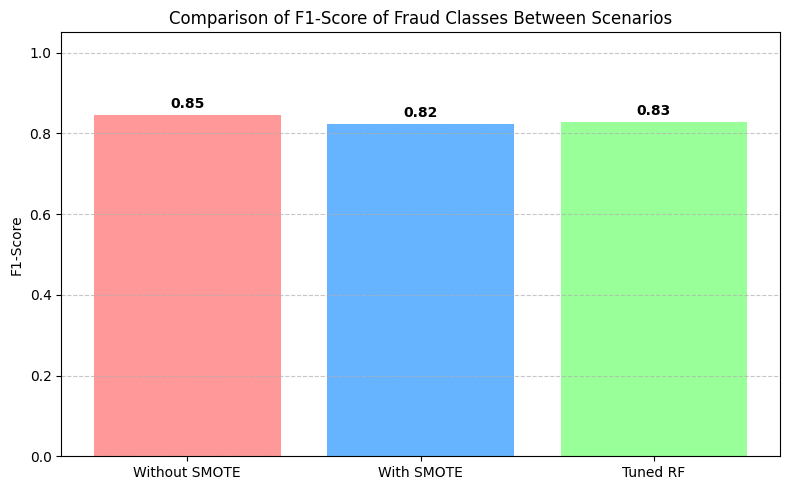

In [ ]:
import matplotlib.pyplot as plt

# Contoh data hasil F1-score tiap skenario (ganti dengan data asli Anda)
skenario_nama = ['Without SMOTE', 'With SMOTE', 'Tuned RF']
f1_scores = [0.8453,  0.8239, 0.8269]  # F1-score untuk kelas 1 (Fraud)

# Plot bar chart
plt.figure(figsize=(8, 5))
bars = plt.bar(skenario_nama, f1_scores, color=['#FF9999', '#66B3FF', '#99FF99'])

# Tambahkan label nilai di atas batang
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.01, f'{height:.2f}',
             ha='center', va='bottom', fontweight='bold')

plt.title('Comparison of F1-Score of Fraud Classes Between Scenarios')
plt.ylabel('F1-Score')
plt.ylim(0, 1.05)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


/tmp/ipython-input-55-1744393047.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=top_feats, palette='viridis')


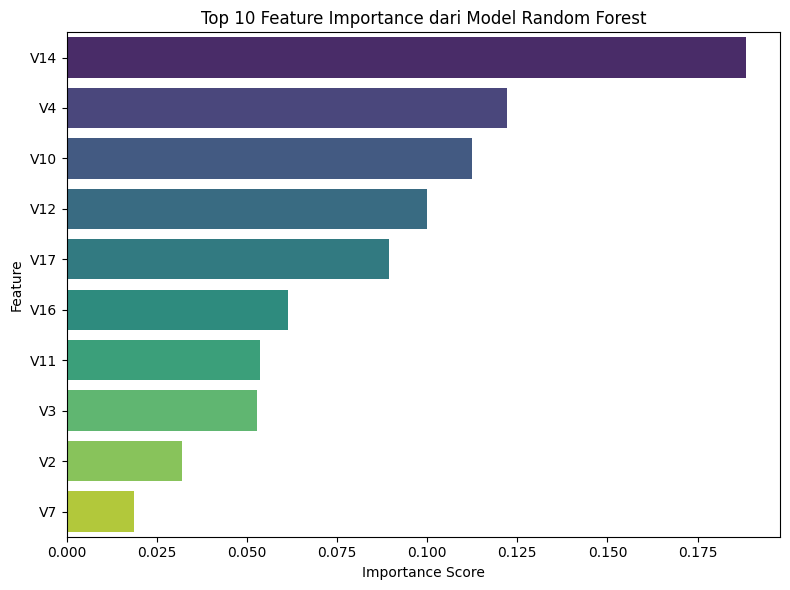

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Asumsikan best_model adalah model terbaik Anda (misalnya dari GridSearch)
# dan X_train_sm adalah fitur training yang digunakan untuk melatih model

# Ambil nama fitur
feature_names = X_train.columns  # gunakan X_train asli, bukan yang sudah SMOTE

# Ambil nilai pentingnya
importances = best_model.feature_importances_

# Buat DataFrame untuk sorting
feat_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Ambil 10 fitur teratas
top_feats = feat_df.head(10)

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=top_feats, palette='viridis')
plt.title('Top 10 Feature Importance dari Model Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()
